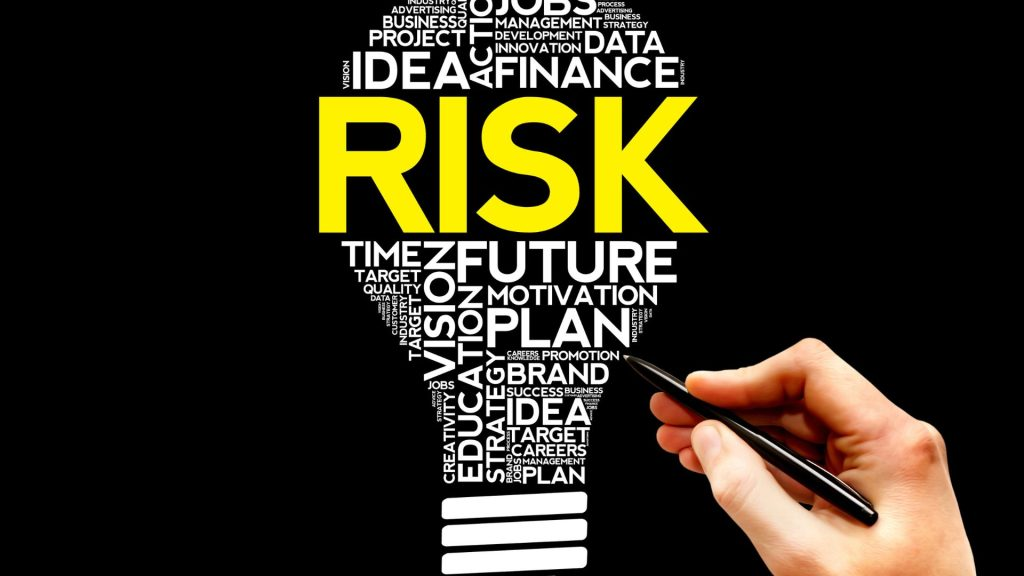

# 1. IMPORT LIBRARY

In [7]:
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import pandas as pd

# 2. Data Preprocessing

In [1]:
import pandas as pd
# Data BCTC
bc18 = pd.read_excel("2018-Vietnam.xlsx", skiprows=7,header=1)
bc19 = pd.read_excel("2019-Vietnam.xlsx", skiprows=7,header=1)
bc20 = pd.read_excel("2020-Vietnam.xlsx", skiprows=7,header=1)
bc21 = pd.read_excel("2021-Vietnam.xlsx", skiprows=7,header=1)
bc22 = pd.read_excel("2022-Vietnam.xlsx", skiprows=7,header=1)

In [2]:
def get_all_stock_data(dt, year):
    # Extract the data for all stocks, regardless of industry
    all_stocks = dt.copy()
    all_stocks.index = [year] * len(all_stocks)
    all_stocks.reset_index(inplace=True)
    all_stocks.rename(columns={'index': 'Year'}, inplace=True)
    
    # Remove the industry-specific column filtering
    for i in range(len(all_stocks.columns)):
        quarter_info = f"\nHợp nhất\nQuý: Hàng năm\nNăm: {year}\n"
        if quarter_info in all_stocks.columns[i]:
            all_stocks.columns = all_stocks.columns.str.replace(quarter_info, " ")
    
    return all_stocks

all_data = pd.concat([get_all_stock_data(bc18, 2018),
                     get_all_stock_data(bc19, 2019),
                     get_all_stock_data(bc20, 2020),
                     get_all_stock_data(bc21, 2021),
                     get_all_stock_data(bc22, 2022)])

def cat_ten(all_data):
    for column in all_data.columns:
        index_hn = column.find("Đơn vị")
        if index_hn != -1:
            colum = column[:index_hn].strip()
            all_data.rename(columns={column: colum}, inplace=True)
cat_ten(all_data)
all_data.columns = all_data.columns.str.upper()
all_data.sort_values(by=["MÃ", "YEAR"], inplace=True)



In [3]:
def cat_ten(all_data):
    for column in all_data.columns:
        index_hn = column.find("Đơn vị")
        if index_hn != -1:
            colum = column[:index_hn].strip()
            all_data.rename(columns={column: colum}, inplace=True)
cat_ten(all_data)
all_data.columns = all_data.columns.str.upper()
all_data.sort_values(by=["MÃ", "YEAR"], inplace=True)



In [4]:
all_data

,YEAR,STT,MÃ,TÊN CÔNG TY,SÀN,NGÀNH ICB - CẤP 1,NGÀNH ICB - CẤP 2,NGÀNH ICB - CẤP 3,NGÀNH ICB - CẤP 4,QUÝ,...,TM. CHI PHÍ TÀI CHÍNH KHÁC,TM. CHI PHÍ SẢN XUẤT THEO YẾU TỐ,"TM. CHI PHÍ NGUYÊN LIỆU, VẬT LIỆU",TM. CHI PHÍ NHÂN CÔNG,TM.CHI PHÍ KHẤU HAO TÀI SẢN CỐ ĐỊNH,TM. CHI PHÍ DỊCH VỤ MUA NGOÀI,TM. CHI PHÍ KHÁC BẰNG TIỀN,BCTCKH. DOANH THU KẾ HOẠCH,BCTCKH. TỔNG LỢI NHUẬN KẾ TOÁN TRƯỚC THUẾ,BCTCKH. LỢI NHUẬN SAU THUẾ THU NHẬP DOANH NGHIỆP
749,2018,750,A32,Công ty 32,UPCoM,Hàng Tiêu dùng,Hàng cá nhân & Gia dụng,Hàng cá nhân,Giầy dép,5.0,...,577387667.0,5.850382e+11,3.823191e+11,1.594232e+11,8.193691e+09,1.391097e+10,2.119123e+10,6.757550e+11,5.495250e+10,4.396200e+10
749,2019,750,A32,Công ty 32,UPCoM,Hàng Tiêu dùng,Hàng cá nhân & Gia dụng,Hàng cá nhân,Giầy dép,5.0,...,606499592.0,5.593825e+11,3.410047e+11,1.671317e+11,8.775815e+09,1.519472e+10,2.727559e+10,7.378330e+11,5.948500e+10,4.758800e+10
749,2020,750,A32,Công ty 32,UPCoM,Hàng Tiêu dùng,Hàng cá nhân & Gia dụng,Hàng cá nhân,Giầy dép,5.0,...,783694339.0,5.700758e+11,3.534101e+11,1.720478e+11,9.401832e+09,2.132139e+10,1.389464e+10,6.508200e+11,5.146250e+10,4.117000e+10
749,2021,750,A32,Công ty 32,UPCoM,Hàng Tiêu dùng,Hàng cá nhân & Gia dụng,Hàng cá nhân,Giầy dép,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.901360e+11,4.151500e+10,3.321200e+10
749,2022,750,A32,Công ty 32,UPCoM,Hàng Tiêu dùng,Hàng cá nhân & Gia dụng,Hàng cá nhân,Giầy dép,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.252790e+11,4.514600e+10,3.611680e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,2022,Website: https://fiingroup.vn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1671,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1672,2022,TRUNG TÂM CHĂM SÓC KHÁCH HÀNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1673,2022,T: (84-24) - 3562 6962 - Ext: 103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Lấy cột Mã và YEAR từ bảng all_data
df = all_data[['MÃ', 'YEAR']]

# Lọc cột chứa thông tin CĐKT
columns_cdkt = all_data.filter(like='CĐKT.').columns
df = pd.concat([df, all_data[columns_cdkt]], axis=1)

# Lọc cột chứa thông tin KQKD
columns_kqkd = all_data.filter(like='KQKD.').columns
df = pd.concat([df, all_data[columns_kqkd]], axis=1)

# Lọc cột chứa thông tin Lưu chuyển tiền tệ
columns_lctt = all_data.filter(like='LCTT.').columns
df = pd.concat([df, all_data[columns_lctt]], axis=1)

# Lọc cột chứa thông tin TM
columns_tm = all_data.filter(like='TM.').columns
df = pd.concat([df, all_data[columns_tm]], axis=1)

# Lọc cột chứa thông tin BCTCKH
columns_bctckh = all_data.filter(like='BCTCKH.').columns
df = pd.concat([df, all_data[columns_bctckh]], axis=1)


# 3. Reseach Methodology

## 3.1 S-score Model

Calculates the bankruptcy risk of businesses, forming the basis for classifying companies into risky and non-risky categories.

In [28]:
X1 = df['CĐKT. TÀI SẢN NGẮN HẠN'] / df['CĐKT. TỔNG CỘNG TÀI SẢN'] 
X2 = (df['KQKD. TỔNG LỢI NHUẬN KẾ TOÁN TRƯỚC THUẾ'] + df['KQKD. TRONG ĐÓ: CHI PHÍ LÃI VAY']) / df['CĐKT. TỔNG CỘNG TÀI SẢN']
X3 = df['KQKD. TỔNG LỢI NHUẬN KẾ TOÁN TRƯỚC THUẾ'] / df['CĐKT. NỢ NGẮN HẠN']
X4 = df['KQKD. DOANH THU THUẦN'] / df['CĐKT. TỔNG CỘNG TÀI SẢN']
s_score = 1.03 * X1 + 3.07 * X2 + 0.66 * X3 + 0.4 * X4
risk = np.where(s_score < 0.862, 1, 0)

## 3.2 LASSO Model

Identifies the top five most influential independent variables from a pool of 29 variables derived from the collected data.

In [29]:
X1 = df['CĐKT. TÀI SẢN NGẮN HẠN'] / df['CĐKT. NỢ NGẮN HẠN']
X6 = df['KQKD. DOANH THU BÁN HÀNG VÀ CUNG CẤP DỊCH VỤ'] / df['CĐKT. TỔNG CỘNG TÀI SẢN']
X11 = df['KQKD. LỢI NHUẬN SAU THUẾ THU NHẬP DOANH NGHIỆP']/df['CĐKT. TỔNG CỘNG TÀI SẢN']
X18 = df['CĐKT. NỢ DÀI HẠN']/df['CĐKT. TỔNG CỘNG TÀI SẢN']
X26 = df['CĐKT. NỢ NGẮN HẠN']/ df['CĐKT. TỔNG CỘNG TÀI SẢN']


In [32]:
# Tạo DataFrame mới
new_df = pd.DataFrame({
    'code' : df['MÃ'],
    'date': df['YEAR'],
    'X1': X1,
    'X6': X6, 
    'X11': X11,
    'X18': X18,
    'X26': X26,
    's_score': s_score,
    'risk': risk
    
})

In [33]:
new_df

,code,date,X1,X6,X11,X18,X26,s_score,risk
749,A32,2018,1.264545,1.378324,0.091920,0.005182,0.566503,1.754379,0
749,A32,2019,1.423463,1.589877,0.107973,0.003286,0.482579,1.920934,0
749,A32,2020,1.449502,1.492094,0.086233,0.000000,0.503954,1.802925,0
749,A32,2021,1.387272,1.231036,0.065532,0.000000,0.548625,1.614130,0
749,A32,2022,1.251798,1.313869,0.066977,0.000000,0.606542,1.640671,0
...,...,...,...,...,...,...,...,...,...
1670,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,0
1671,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,0
1672,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,0
1673,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,0


In [34]:
# Drop rows with NaN values in any of the specified columns
new_df = new_df.dropna(subset=['X1', 'X6', 'X11', 'X18', 'X26', 's_score'])
new_df

,code,date,X1,X6,X11,X18,X26,s_score,risk
749,A32,2018,1.264545,1.378324,0.091920,0.005182,0.566503,1.754379,0
749,A32,2019,1.423463,1.589877,0.107973,0.003286,0.482579,1.920934,0
749,A32,2020,1.449502,1.492094,0.086233,0.000000,0.503954,1.802925,0
749,A32,2021,1.387272,1.231036,0.065532,0.000000,0.548625,1.614130,0
749,A32,2022,1.251798,1.313869,0.066977,0.000000,0.606542,1.640671,0
...,...,...,...,...,...,...,...,...,...
1663,YTC,2018,1.042297,0.700437,0.018324,0.031664,0.894835,1.232862,0
1663,YTC,2019,1.043100,0.689829,0.020102,0.038325,0.882040,1.221492,0
1663,YTC,2020,0.957338,0.612780,-0.012067,0.001195,0.985285,1.080756,0
1663,YTC,2021,0.924809,0.790917,0.012443,0.001016,0.998456,1.256127,0


In [35]:
# Thống kê mô tả
description = new_df[['X1', 'X6', 'X11', 'X18', 'X26']].describe()
description

,X1,X6,X11,X18,X26
count,7306.000000,7306.000000,7306.000000,7306.000000,7306.000000
mean,2.729195,1.152448,0.028076,0.107426,0.519560
std,8.064433,2.547350,0.381798,0.264845,1.791078
min,0.001221,-0.050494,-21.143065,-0.066669,0.000622
25%,1.060950,0.351314,0.006911,0.000862,0.194984
50%,1.411576,0.813709,0.033866,0.026167,0.367520
75%,2.401049,1.413081,0.076003,0.138554,0.577949
max,408.731402,185.731414,2.873531,9.415347,79.214671


## 3.3 Visualization

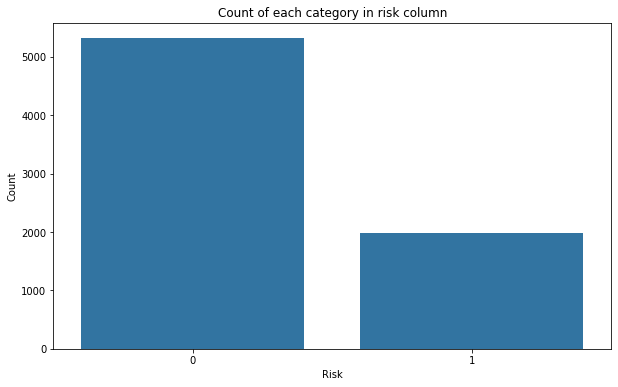

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ biểu đồ cột cho cột 'risk'
plt.figure(figsize=(10, 6))
sns.countplot(x='risk', data=new_df)
plt.title('Count of each category in risk column')
plt.xlabel('Risk')
plt.ylabel('Count')
plt.show()


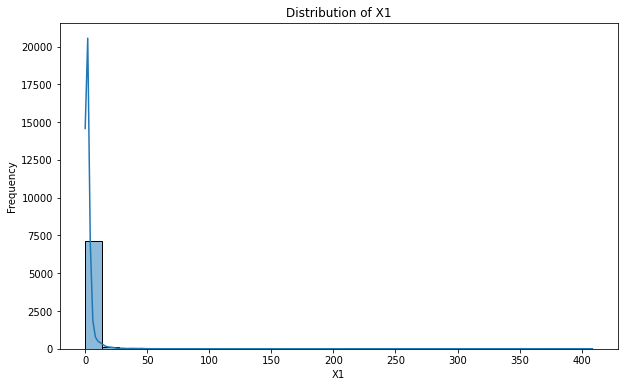

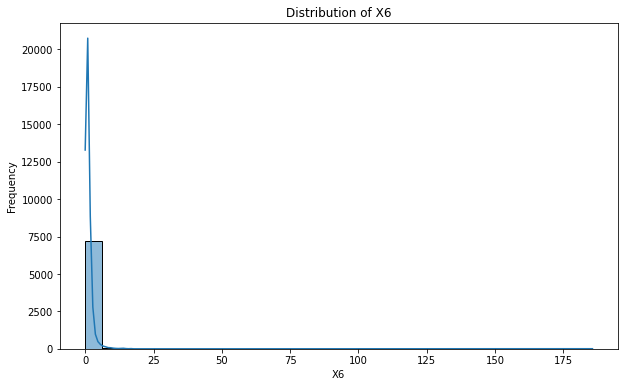

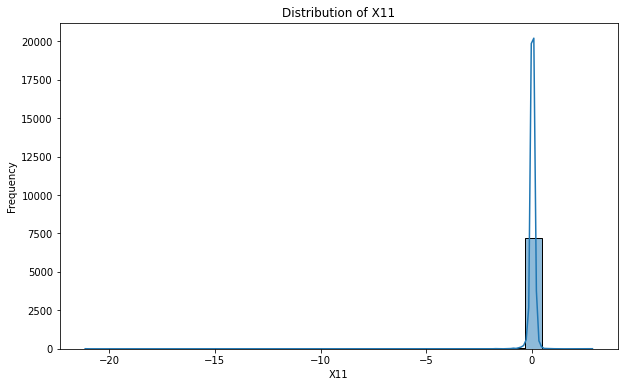

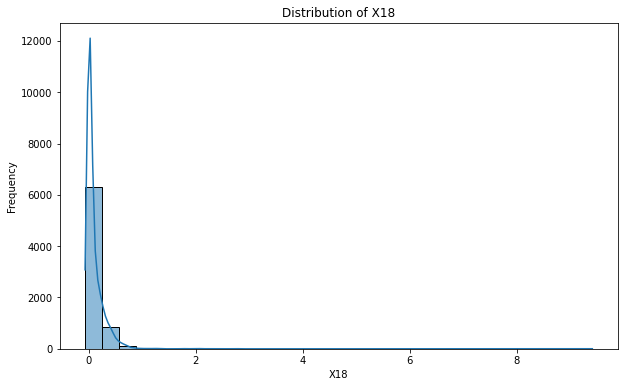

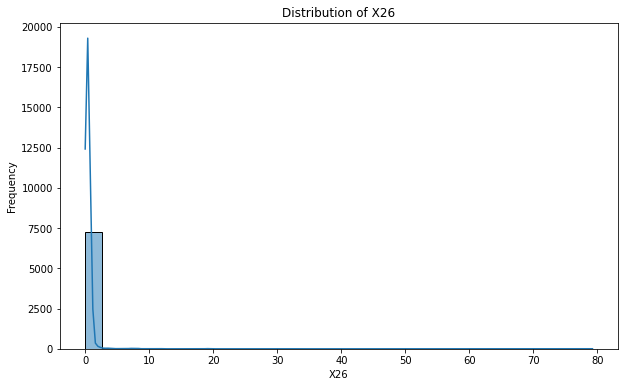

In [37]:
# Các cột cần vẽ histogram
columns_to_plot = ['X1', 'X6', 'X11', 'X18', 'X26']

# Lặp qua từng cột và vẽ histogram
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(new_df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

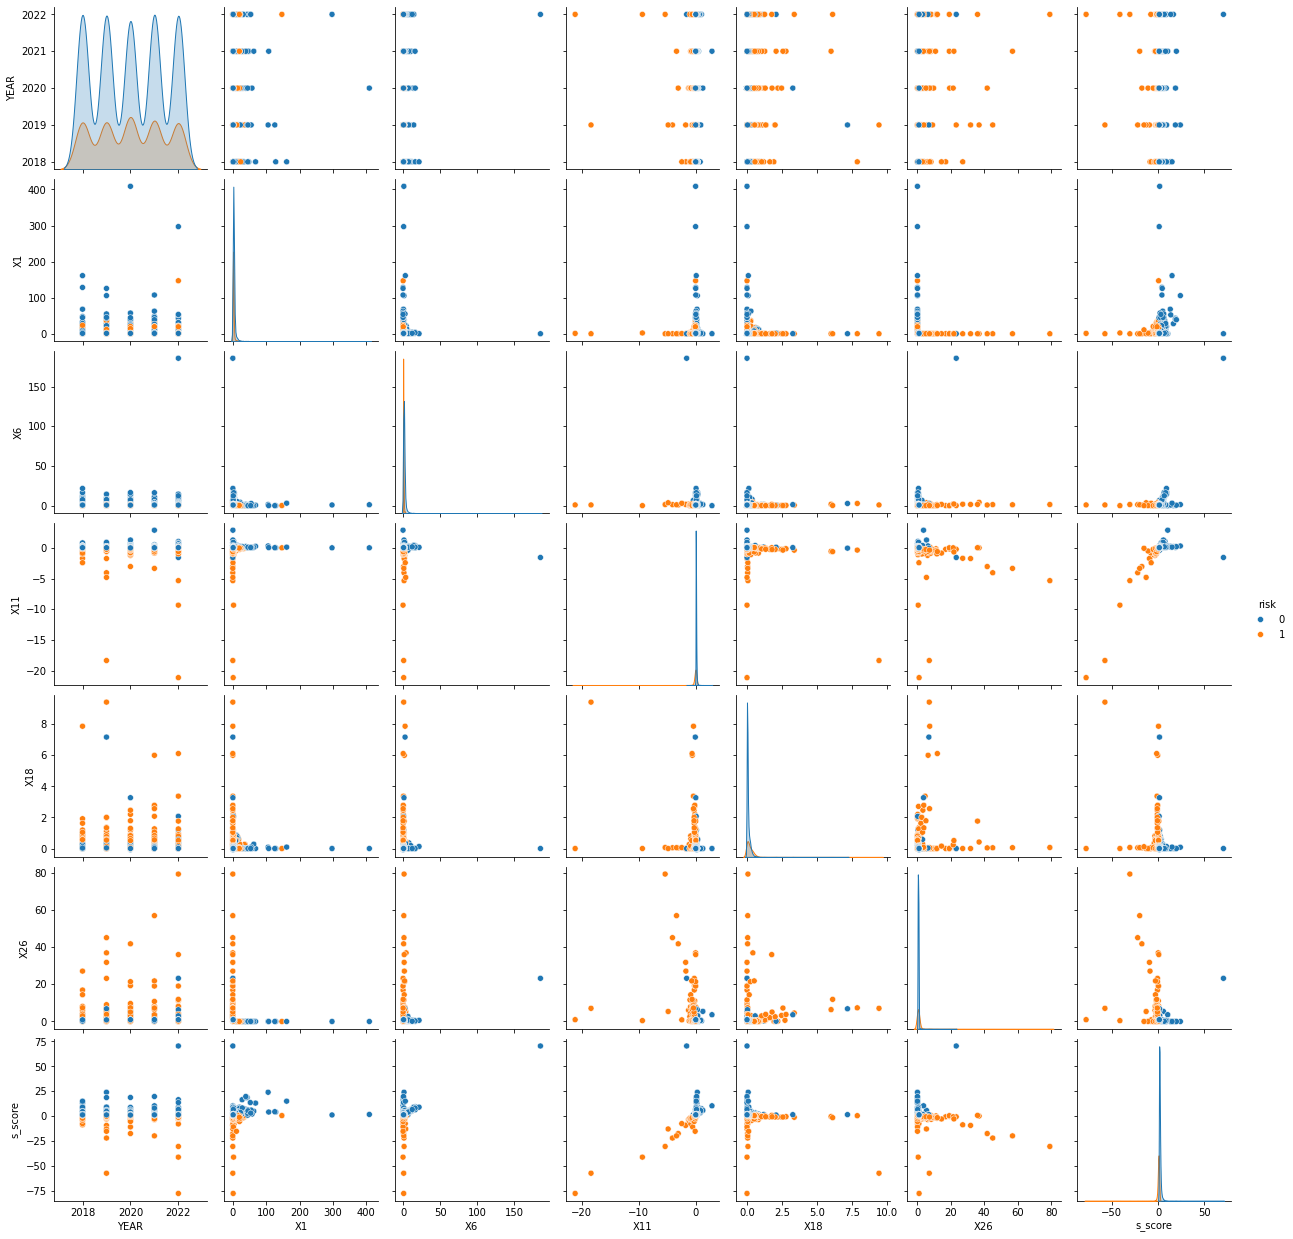

In [18]:
# Pair Plot
sns.pairplot(new_df, hue='risk', diag_kind='kde')
plt.show()


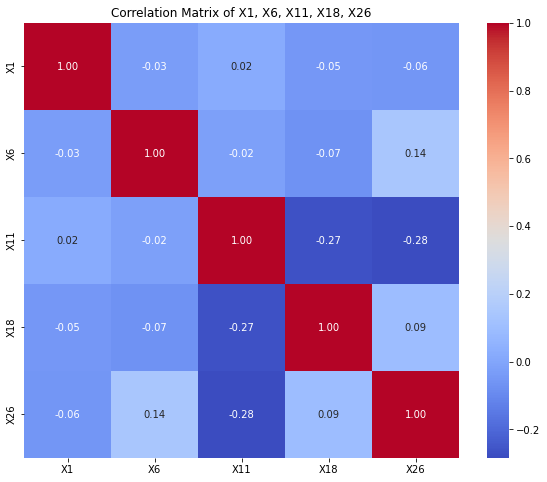

In [38]:
# Chọn các cột cần phân tích
columns_to_analyze = ['X1', 'X6', 'X11', 'X18', 'X26']

# Tạo ma trận tương quan
correlation_matrix = new_df[columns_to_analyze].corr()

# Vẽ heatmap của ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of X1, X6, X11, X18, X26')
plt.show()

## 3.4 Model Selection in Machine Learning

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

# Loại bỏ các cột không cần thiết và chọn các biến đã được lọc bởi LASSO
X = new_df[['X1', 'X6', 'X11', 'X18', 'X26']]
y = new_df['risk']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Bước 2: Huấn luyện và Đánh giá các Mô hình Học Máy
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Artificial Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

results = {}

for name, model in models.items():
    # Huấn luyện mô hình
    model.fit(X_train, y_train)
    # Dự báo trên tập kiểm tra
    y_pred = model.predict(X_test)
    # Đánh giá mô hình
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Lưu kết quả
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
       
    }

# Tạo DataFrame từ kết quả
df_results = pd.DataFrame(results)
df_results


,Logistic Regression,Decision Tree,Random Forest,K-Nearest Neighbors,Support Vector Machine,Artificial Neural Network
Accuracy,0.886457,0.936389,0.949384,0.925445,0.924761,0.971272
Precision,0.805797,0.865979,0.924370,0.864130,0.886957,0.956403
Recall,0.737401,0.891247,0.875332,0.843501,0.811671,0.931034
F1 Score,0.770083,0.878431,0.899183,0.853691,0.847645,0.943548


## 3.5 Artificial Neural Network (ANN) Model

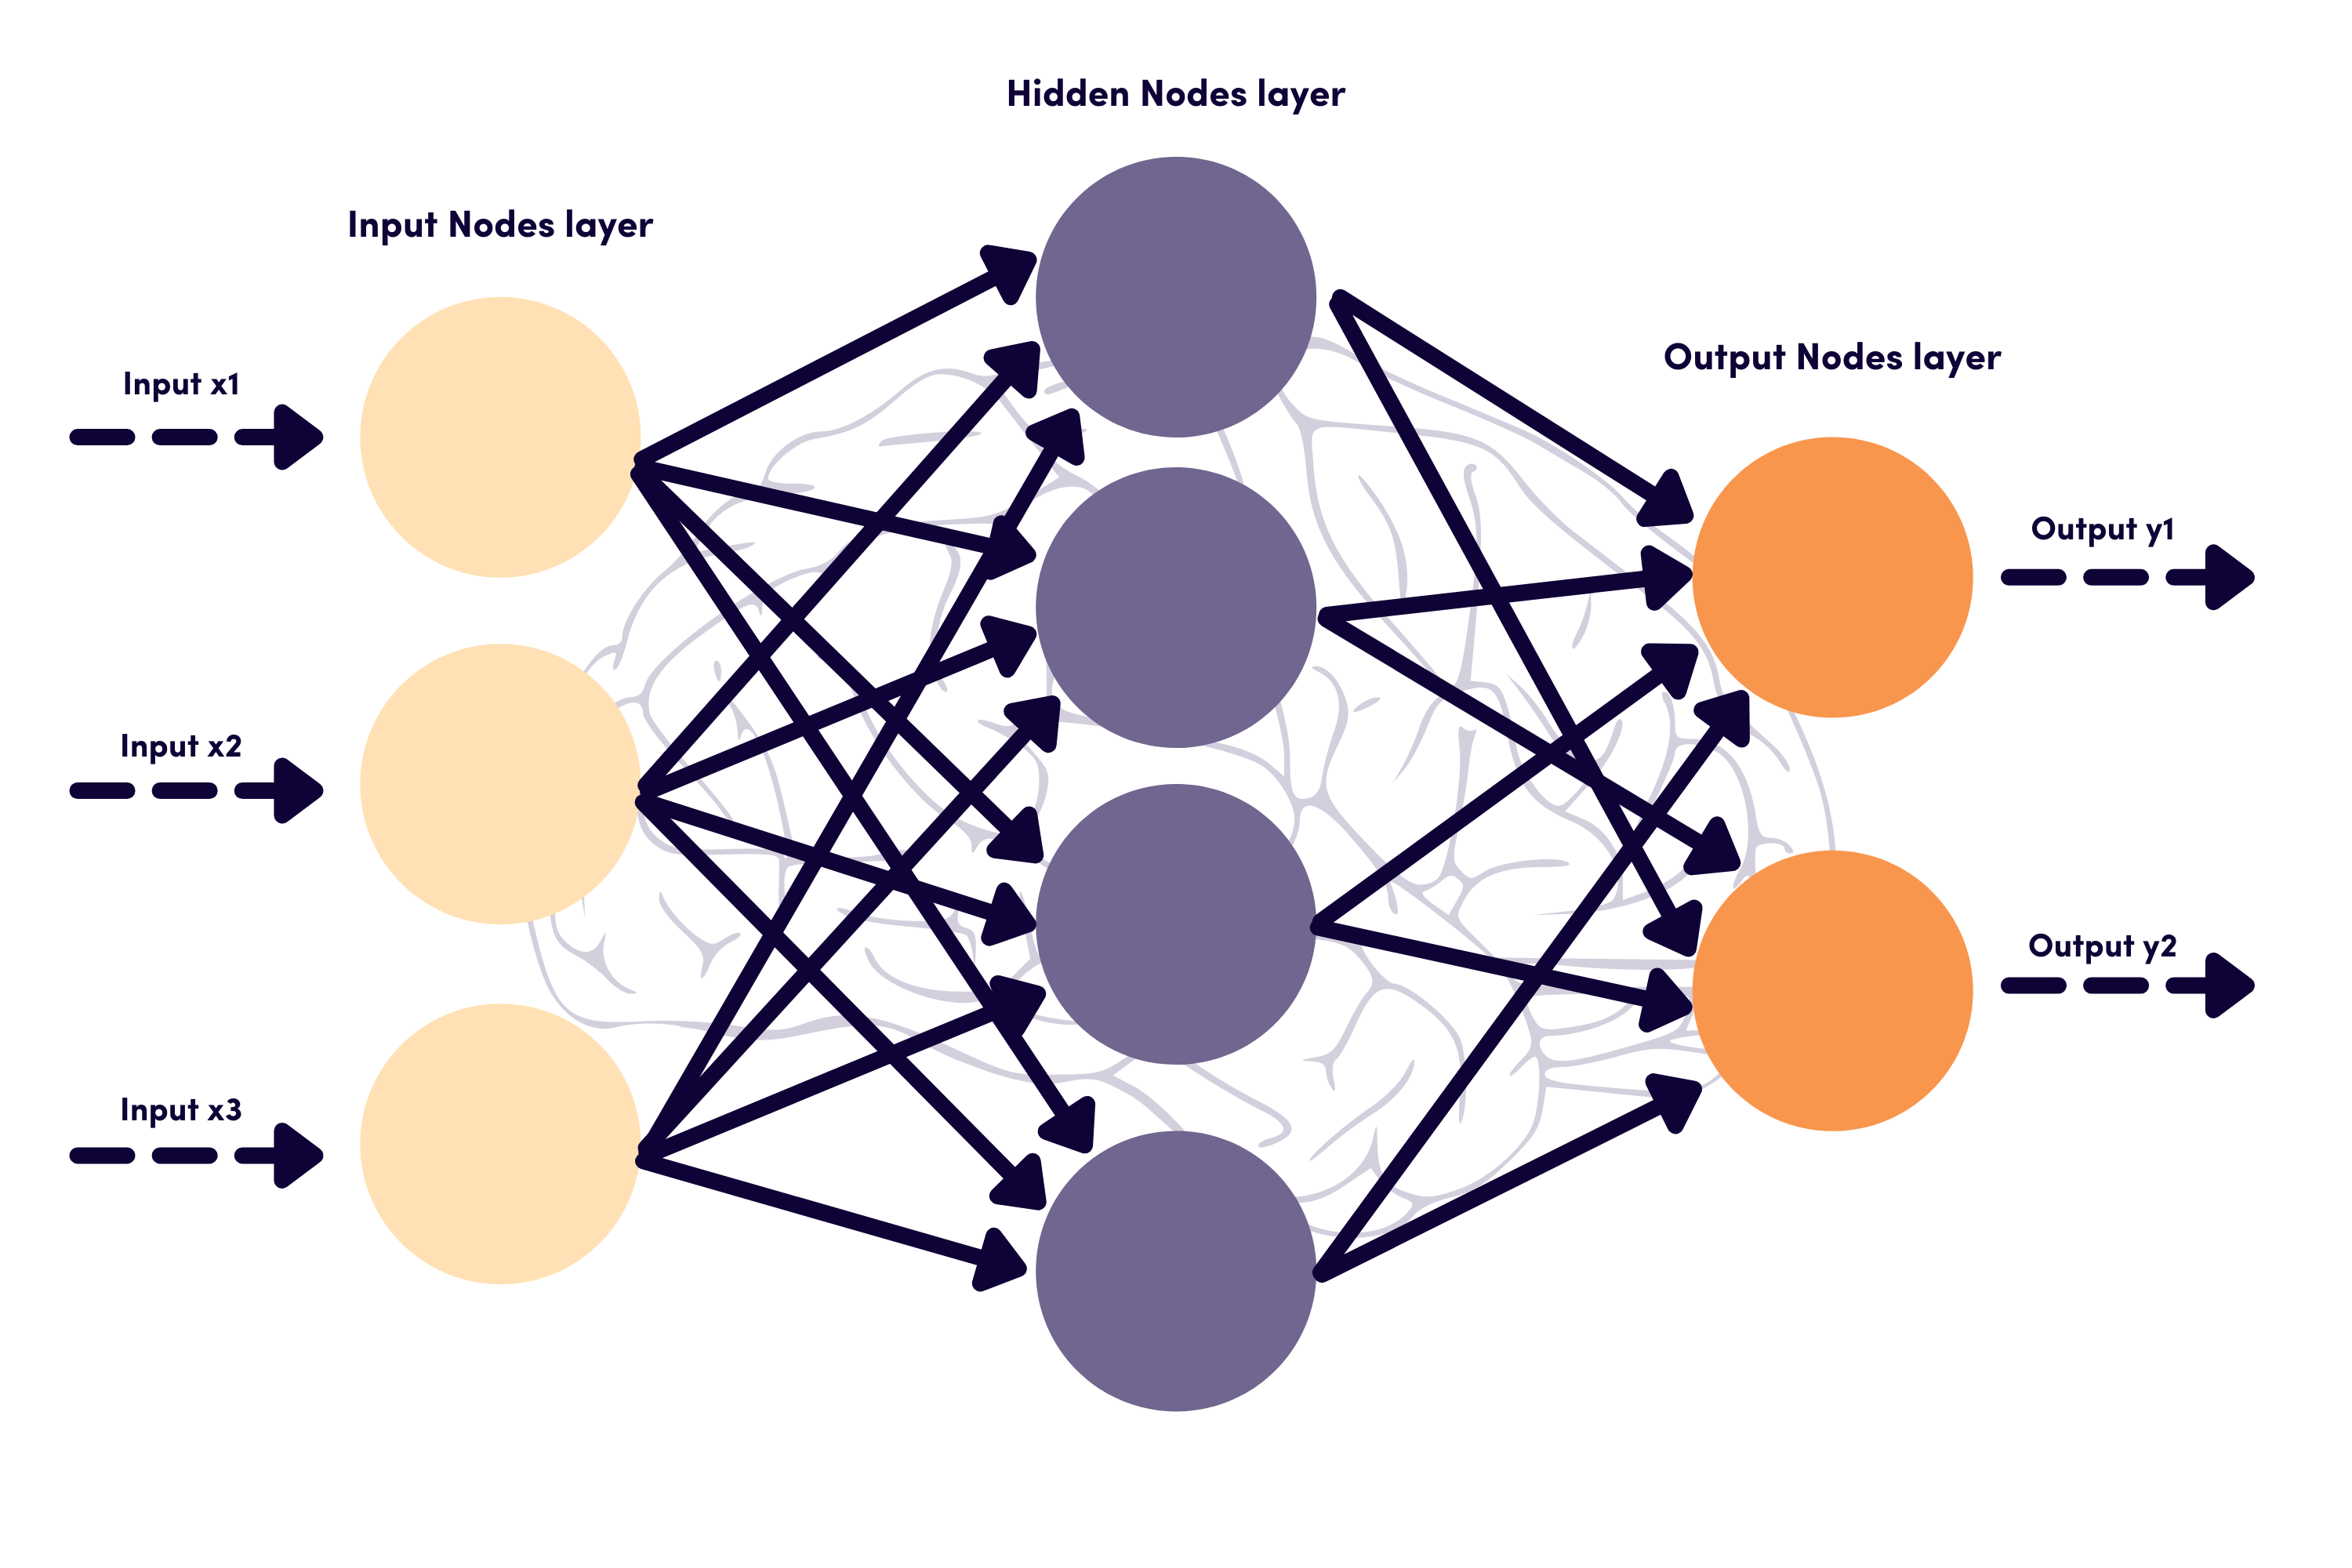

Training and Experimentation with Data Using Artificial Neural Network Model

## 3.5.1 Retraining on the dataset from 2018 to 2021

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Lọc dữ liệu từ năm 2018 đến năm 2021
filtered_data = new_df[(new_df['date'] >= 2018) & (new_df['date'] <= 2021)]

# Bước 2: Chuẩn bị Dữ liệu
# Chọn các biến đã được lọc bởi LASSO
X = filtered_data[['X1', 'X6', 'X11', 'X18', 'X26']]
y = filtered_data['risk']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Bước 3: Huấn luyện và Đánh giá Mô hình Mạng Nơ-ron
# Khởi tạo mô hình mạng nơ-ron nhân tạo (ANN)
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Huấn luyện mô hình
ann.fit(X_train, y_train)

# Dự báo trên tập kiểm tra
y_train_pred = ann.predict(X_train)
y_test_pred = ann.predict(X_test)

# Đánh giá mô hình
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Hiển thị classification report
train_classification_report = classification_report(y_train, y_train_pred)
test_classification_report = classification_report(y_test, y_test_pred)



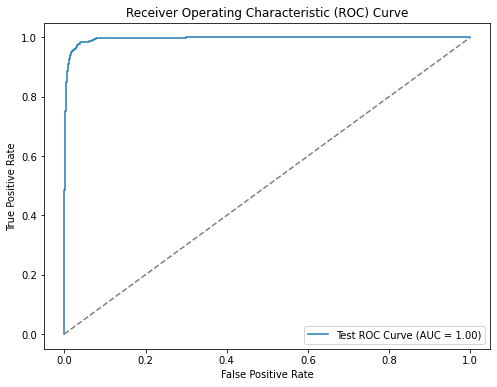

In [43]:
from sklearn.metrics import roc_curve, auc
# Tính toán scores của ROC curve cho dữ liệu huấn luyện và kiểm tra
test_fpr, test_tpr, _ = roc_curve(y_test, ann.predict_proba(X_test)[:,1])

# Tính toán diện tích dưới ROC curve (AUC)
test_auc = auc(test_fpr, test_tpr)

# Vẽ ROC curve
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, label=f'Test ROC Curve (AUC = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [44]:
# In kết quả
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"Confusion Matrix:\n{train_conf_matrix}")
print(f"Classification Report:\n{train_classification_report}")

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Confusion Matrix:\n{test_conf_matrix}")
print(f"Classification Report:\n{test_classification_report}")

Training Metrics:
Accuracy: 0.9783
Precision: 0.9625
Recall: 0.9582
F1 Score: 0.9603
Confusion Matrix:
[[2933   42]
 [  47 1077]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2975
           1       0.96      0.96      0.96      1124

    accuracy                           0.98      4099
   macro avg       0.97      0.97      0.97      4099
weighted avg       0.98      0.98      0.98      4099


Testing Metrics:
Accuracy: 0.9738
Precision: 0.9581
Recall: 0.9462
F1 Score: 0.9521
Confusion Matrix:
[[1254   20]
 [  26  457]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1274
           1       0.96      0.95      0.95       483

    accuracy                           0.97      1757
   macro avg       0.97      0.97      0.97      1757
weighted avg       0.97      0.97      0.97      1757



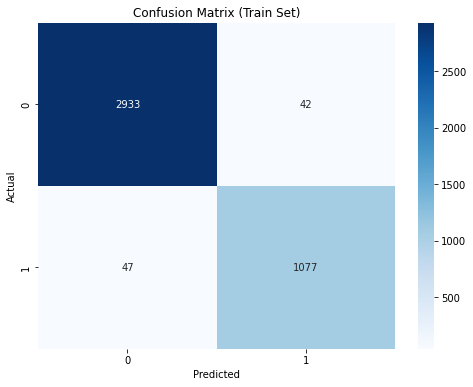

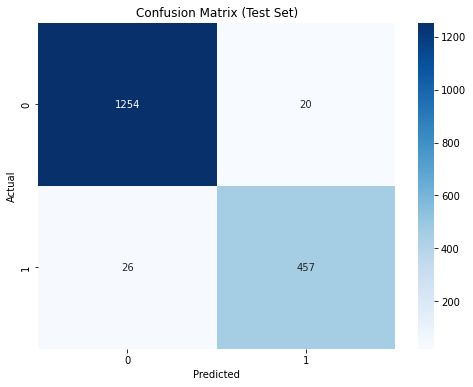

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt


# Vẽ biểu đồ Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(train_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (Train Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Vẽ biểu đồ Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(test_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 3.5.2 Retesting on real data in 2022

In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

# Giả sử 'new_df' là DataFrame đã có sẵn
# Lọc dữ liệu từ năm 2018 đến năm 2021 để huấn luyện mô hình
train_data = new_df[(new_df['date'] >= 2018) & (new_df['date'] <= 2021)]

# Chuẩn bị dữ liệu huấn luyện
X_train = train_data[['X1', 'X6', 'X11', 'X18', 'X26']]
y_train = train_data['risk']

# Chuẩn hóa dữ liệu huấn luyện
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Khởi tạo và huấn luyện mô hình mạng nơ-ron nhân tạo (ANN)
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
ann.fit(X_train_scaled, y_train)

# Lọc dữ liệu của năm 2022 để kiểm tra mô hình
test_data_2022 = new_df[new_df['date'] == 2022]

# Chuẩn bị dữ liệu kiểm tra năm 2022
X_test_2022 = test_data_2022[['X1', 'X6', 'X11', 'X18', 'X26']]
y_test_2022 = test_data_2022['risk']

# Chuẩn hóa dữ liệu kiểm tra
X_test_2022_scaled = scaler.transform(X_test_2022)

# Dự báo trên tập dữ liệu năm 2022
y_test_2022_pred = ann.predict(X_test_2022_scaled)

# Đánh giá mô hình trên tập dữ liệu năm 2022
accuracy_2022 = accuracy_score(y_test_2022, y_test_2022_pred)
precision_2022 = precision_score(y_test_2022, y_test_2022_pred)
recall_2022 = recall_score(y_test_2022, y_test_2022_pred)
f1_2022 = f1_score(y_test_2022, y_test_2022_pred)
conf_matrix_2022 = confusion_matrix(y_test_2022, y_test_2022_pred)
class_report_2022 = classification_report(y_test_2022, y_test_2022_pred)

print("\nKết quả đánh giá trên dữ liệu năm 2022")
print(f"Độ chính xác: {accuracy_2022:.4f}")
print(f"Precision: {precision_2022:.4f}")
print(f"Recall: {recall_2022:.4f}")
print(f"F1 Score: {f1_2022:.4f}")
print("Ma trận nhầm lẫn:\n", conf_matrix_2022)
print("Classification Report:\n", class_report_2022)



Kết quả đánh giá trên dữ liệu năm 2022
Độ chính xác: 0.9669
Precision: 0.9489
Recall: 0.9241
F1 Score: 0.9363
Ma trận nhầm lẫn:
 [[1049   19]
 [  29  353]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1068
           1       0.95      0.92      0.94       382

    accuracy                           0.97      1450
   macro avg       0.96      0.95      0.96      1450
weighted avg       0.97      0.97      0.97      1450



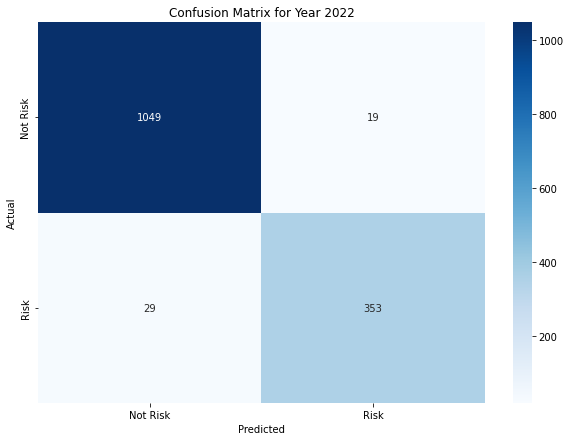

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_2022, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Risk', 'Risk'], yticklabels=['Not Risk', 'Risk'])
plt.title('Confusion Matrix for Year 2022')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

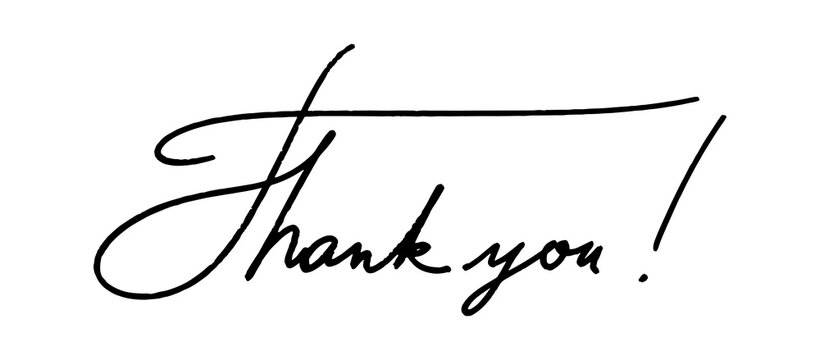